<a href="https://colab.research.google.com/github/Gio-Choi/Stock_Regime_Analysis/blob/main/Benchmark_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone_Dataset_Next.csv')

In [4]:
df

,Unnamed: 0,^GSPC,VIXCLS,CPIAUCSL,M2SL,FEDFUNDS,T10Y2Y,AAA,UNRATE,PCUOMFGOMFG,USPHCI,IQ,S&P_pct
0,2004-04-01,1132.170044,16.65,187.400,6191.2,1.00,2.26,5.73,5.6,141.8,91.28,103.7,0.0
1,2004-05-03,1117.489990,16.62,188.200,6268.1,1.00,2.19,6.04,5.6,143.3,91.52,104.1,0.0
2,2004-06-01,1121.199951,16.30,188.900,6270.5,1.03,2.11,6.01,5.6,142.9,91.73,103.4,1.0
3,2004-07-01,1128.939941,15.20,189.100,6284.3,1.26,1.93,5.82,5.5,143.2,91.95,103.9,1.0
4,2004-08-02,1106.619995,15.37,189.200,6310.6,1.43,1.82,5.65,5.4,143.7,92.15,103.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2020-08-03,3294.610107,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1,1.0
197,2020-09-01,3526.649902,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8,1.0
198,2020-10-01,3380.800049,26.70,260.352,18735.7,0.09,0.54,2.35,6.9,193.7,122.93,123.0,0.0
199,2020-11-02,3310.239990,37.13,260.721,18969.8,0.09,0.71,2.30,6.7,194.5,123.41,124.0,0.0


In [6]:
dataset = df.values
dataset[:,2:12]

array([[16.65, 187.4, 6191.2, ..., 141.8, 91.28, 103.7],
       [16.62, 188.2, 6268.1, ..., 143.3, 91.52, 104.1],
       [16.3, 188.9, 6270.5, ..., 142.9, 91.73, 103.4],
       ...,
       [26.7, 260.352, 18735.7, ..., 193.7, 122.93, 123.0],
       [37.13, 260.721, 18969.8, ..., 194.5, 123.41, 124.0],
       [20.77, 261.564, 19124.7, ..., 196.7, 123.66, 125.5]], dtype=object)

In [7]:
train_data, test_data = train_test_split(dataset, test_size = 0.2, random_state = 42)
print("훈련 데이터 개수 : ", len(train_data))
print("테스트 데이터 개수 : ", len(test_data))

훈련 데이터 개수 :  160
테스트 데이터 개수 :  41


In [8]:
# train
X = train_data[:,2:12].astype(float)
Y = train_data[:,-1]

In [9]:
# test
X_test = test_data[:,2:12].astype(float)
Y_test = test_data[:,-1]
encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
Y_test = encoder_test.transform(Y_test)

In [10]:
# number of factors
len(X[0])

10

In [11]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [12]:
Y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [13]:
log_reg_model = LogisticRegression(max_iter=2500, random_state=42)
log_reg_model.fit(X, Y)

LogisticRegression(max_iter=2500, random_state=42)

In [14]:
# Predict
y_pred = log_reg_model.predict(X_test) 
y_true = Y_test 

In [18]:
# Model Evaluation
print("Accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred,
                                                               average='binary')
print("Precision: ", np.round(precision, 2))
print("Recall: ", np.round(recall, 2))
print("F-Score: ", np.round(fscore, 2))

Accuracy: 0.76
Precision:  0.76
Recall:  0.93
F-Score:  0.83


Confusion Matrix


Text(87.0, 0.5, 'True')

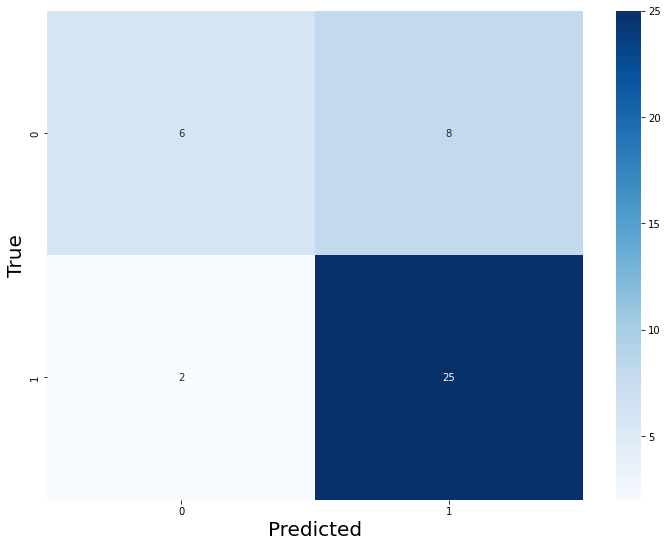

In [19]:
plt.figure(figsize=(12, 9))
cf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('True', fontsize=20)